In [ ]:
pip install geopandas


In [2]:
# Importando a biblioteca GeoPandas
import geopandas as gpd
import pandas as pd
import pyproj as pyp

In [3]:
# Lendo o arquivo shapefile
shape_vias_centro = gpd.read_file("Vias_Centro.shp")

In [4]:
# Encontrando os cruzamentos
shape_cruzamentos = gpd.overlay(shape_vias_centro,shape_vias_centro, how='intersection', keep_geom_type=False) 
shape_cruzamentos = shape_cruzamentos [shape_cruzamentos.geom_type=='Point'] # seleciona somente os pontos
shape_cruzamentos.drop_duplicates('geometry',inplace = True) # deleta os dados duplicados
shape_cruzamentos.geometry

1       POINT (-43.94348 -19.91661)
2       POINT (-43.94357 -19.91662)
4       POINT (-43.94339 -19.91666)
5       POINT (-43.94355 -19.91654)
6       POINT (-43.94334 -19.91668)
                   ...             
4131    POINT (-43.94066 -19.91331)
4182    POINT (-43.93926 -19.91233)
4186    POINT (-43.93327 -19.91479)
4187    POINT (-43.93313 -19.91466)
4198    POINT (-43.93329 -19.91471)
Name: geometry, Length: 766, dtype: geometry

In [7]:
shape_cruzamentos_LATLONG=shape_cruzamentos.copy()
shape_cruzamentos_LATLONG['LATITUDE']=shape_cruzamentos_LATLONG.geometry.y
shape_cruzamentos_LATLONG['LONGITUDE']=shape_cruzamentos_LATLONG.geometry.x
shape_cruzamentos_plot=pd.DataFrame({'LATITUDE':shape_cruzamentos_LATLONG['LATITUDE'],'LONGITUDE':shape_cruzamentos_LATLONG['LONGITUDE']})
shape_cruzamentos_plot.to_csv('pontos_cruzamentos.csv')

In [4]:
shape_cruzamentos.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [5]:
# Reprojeção do CRS para projeção Mercator
shape_cruzamentos_proj = shape_cruzamentos.copy()
shape_cruzamentos_proj = shape_cruzamentos_proj.to_crs(epsg=31983)

Text(0.5, 1.0, 'SIRGAS 2000 / UTM zone 23S')

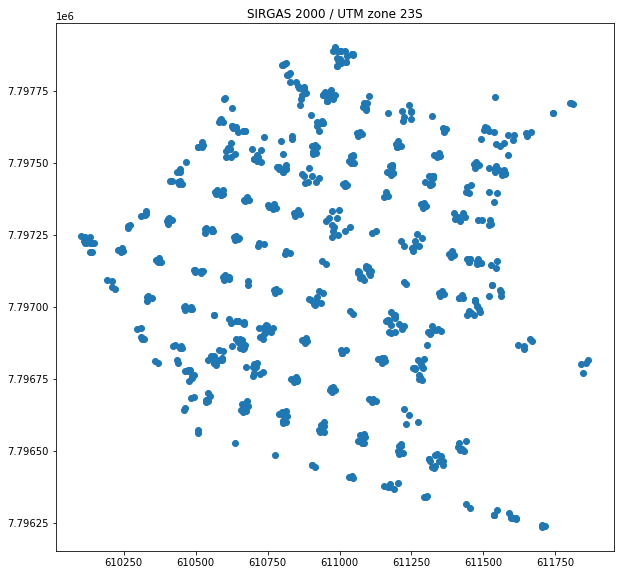

In [6]:
# Visualizando os dados reprojetados
ax=shape_cruzamentos_proj.plot(figsize=(10,10))
ax.set_title(shape_cruzamentos_proj.crs.name)

In [7]:
shape_cruzamentos_proj.crs

<Projected CRS: EPSG:31983>
Name: SIRGAS 2000 / UTM zone 23S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Brazil - between 48°W and 42°W, northern and southern hemispheres, onshore and offshore.
- bounds: (-48.0, -33.5, -42.0, 5.13)
Coordinate Operation:
- name: UTM zone 23S
- method: Transverse Mercator
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [17]:
shape_cruzamentos_proj.geometry

1       POINT (610580.324 7797398.988)
2       POINT (610571.389 7797398.521)
4       POINT (610590.172 7797394.130)
5       POINT (610573.462 7797407.484)
6       POINT (610595.272 7797391.747)
                     ...              
4131    POINT (610877.698 7797763.115)
4182    POINT (611024.727 7797870.671)
4186    POINT (611650.262 7797593.467)
4187    POINT (611665.373 7797608.522)
4198    POINT (611648.340 7797603.079)
Name: geometry, Length: 766, dtype: geometry

In [8]:
# Carregando a Base de Acd + Vec + Met
Base_Acd_Vec_Met = pd.read_excel('Base_Acd_Vec_Met.xlsx')
print(Base_Acd_Vec_Met)

      Unnamed: 0      NUMERO_BOLETIM                   COORDENADA  MÊS  HORA  \
0              0  2017-034438990-001  -19.920010348,-43.940256854   11    17   
1              1  2017-034512721-001  -19.917797895,-43.930673168   11     9   
2              2  2017-035699720-001  -19.917583385,-43.934223834   11     9   
3              3  2017-035769564-001  -19.921013321,-43.944665907   11    17   
4              4  2017-035778537-001  -19.917302950,-43.935374903   11    17   
...          ...                 ...                          ...  ...   ...   
1622        1622  2019-055538489-001  -19.915230923,-43.940353471   11     0   
1623        1623  2019-055674489-001  -19.916618722,-43.943470312   11    17   
1624        1624  2019-055802785-001  -19.914757805,-43.934664832   11    10   
1625        1625  2019-055876803-001  -19.914836098,-43.941116930   11    17   
1626        1626  2019-038564310-001  -19.916010873,-43.940565520    8    20   

           DATA  BICICLETA  MOTOCICLETA

In [18]:
# Criando objeto geoespacial a partir das informações de LAT e LONG 
from shapely.geometry import Point
Base_Acd_Vec_Met['GEOMETRY'] = Base_Acd_Vec_Met.apply(lambda row: Point(row['LONGITUDE'], row['LATITUDE']), axis=1)
Base_Acd_Vec_Met = gpd.GeoDataFrame(Base_Acd_Vec_Met, geometry='GEOMETRY', crs='epsg:4326') # Convertendo em um dataframe
Base_Acd_Vec_Met.geometry

0       POINT (-43.94026 -19.92001)
1       POINT (-43.93067 -19.91780)
2       POINT (-43.93422 -19.91758)
3       POINT (-43.94467 -19.92101)
4       POINT (-43.93537 -19.91730)
                   ...             
1622    POINT (-43.94035 -19.91523)
1623    POINT (-43.94347 -19.91662)
1624    POINT (-43.93466 -19.91476)
1625    POINT (-43.94112 -19.91484)
1626    POINT (-43.94057 -19.91601)
Name: GEOMETRY, Length: 1627, dtype: geometry

In [19]:
Base_Acd_Vec_Met.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [20]:
# Reprojetar o objeto de acidentes
Base_Acd_Vec_Met_proj = Base_Acd_Vec_Met.copy()
Base_Acd_Vec_Met_proj =Base_Acd_Vec_Met_proj.to_crs(epsg=31983)
Base_Acd_Vec_Met_proj.crs

<Projected CRS: EPSG:31983>
Name: SIRGAS 2000 / UTM zone 23S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Brazil - between 48°W and 42°W, northern and southern hemispheres, onshore and offshore.
- bounds: (-48.0, -33.5, -42.0, 5.13)
Coordinate Operation:
- name: UTM zone 23S
- method: Transverse Mercator
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [21]:
Base_Acd_Vec_Met_proj.geometry

0       POINT (610915.450 7797020.800)
1       POINT (611920.150 7797259.310)
2       POINT (611548.640 7797285.410)
3       POINT (610453.250 7796912.700)
4       POINT (611428.350 7797317.210)
                     ...              
1622    POINT (610908.670 7797549.820)
1623    POINT (610581.450 7797398.280)
1624    POINT (611504.460 7797598.420)
1625    POINT (610829.030 7797594.020)
1626    POINT (610885.930 7797463.640)
Name: GEOMETRY, Length: 1627, dtype: geometry

In [29]:
# Verificando quais acidentes aconteceram próximo a cruzamentos de vias
Base_Acd_Vec_Met_proj['CRUZAMENTO'] = Base_Acd_Vec_Met_proj.apply(lambda row: shape_cruzamentos_proj.distance(row['GEOMETRY']).min() < 15,axis=1)

In [30]:
Base_Acd_Vec_Met_proj.to_excel('Base_Acd_Vec_Met_Loc.xlsx', index=False)